In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_1 = cv2.imread('/home/anas/Downloads/image-2.png')
cv2.imshow('original',img_1)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

img_gray = cv2.imread('/home/anas/Downloads/image-2.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow('gray',img_gray)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()



In [3]:
img_arr = np.asarray(img_gray)
print(len(img_arr))
print(img_gray.shape)

392
(392, 400)


In [4]:
flat = img_arr.flatten()
print(type(flat))
hist = np.bincount(flat,minlength=256)
print(hist)

<class 'numpy.ndarray'>
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0    86     0    93     0    49     0    27     0
     0   140     0    24     0    72   145     0   159   129     0   526
   347     0   567   227     0  3905   833  1016     0  9889   270  1744
     0  2273  7848  1796  3964     0  3907  2251 13051   290  6395  3418
  3542     0  1861  3029  1578   492  3720  1811   788   665  1359   514
   495  1138   293   282   319   476   118   628   382   346   275   113
   838   238    34     5   284    84   168   587    61   153   185   246
   580    93   195   143   

In [5]:
x =np.array(range(257))
print(x[:-1])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

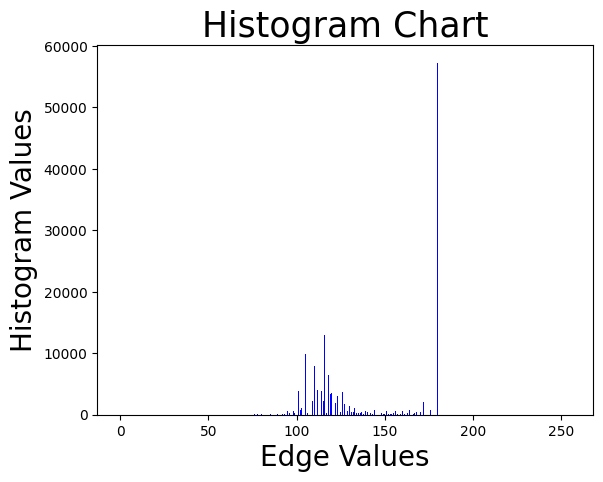

In [6]:
plt.xlabel('Edge Values', fontsize=20)
plt.ylabel('Histogram Values', fontsize=20)
plt.title('Histogram Chart', fontsize=25)
plt.bar(x[:-1], hist, width=0.5, color='blue')
plt.show()

In [7]:
pdf = hist/np.sum(hist)
print(type(pdf))
print(len(pdf))
print("sum=",np.sum(hist))

<class 'numpy.ndarray'>
256
sum= 156800


256


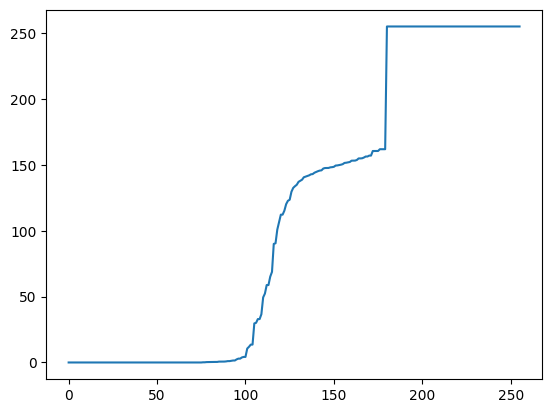

In [8]:
def cdf(data):
    data= iter(data)
    b=[next(data)]
    for i in data:
        b.append(b[-1]+i)
    return np.array(b)

cumsum = cdf(pdf)
print(len(cumsum))
plt.plot(cumsum*255)

In [9]:
cumsum=cumsum*255
scdf = cumsum.astype(int)
print(scdf)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   1   1   1   1   2   2   2   3   4   4  10  11  13  13  29  30  32
  32  36  49  52  58  58  65  68  89  90 100 106 112 112 115 120 122 123
 129 132 133 134 137 137 138 140 141 141 142 142 142 144 144 145 145 145
 147 147 147 147 148 148 148 149 149 149 150 150 151 151 151 152 153 153
 153 153 154 154 154 155 156 156 157 157 160 160 160 160 161 161 161 161
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

In [10]:
new_img = scdf [flat]
print(len(new_img))
# plt.hist(new_img,bins=256)


156800


In [11]:
new_img = np.reshape(new_img, img_gray.shape)

True

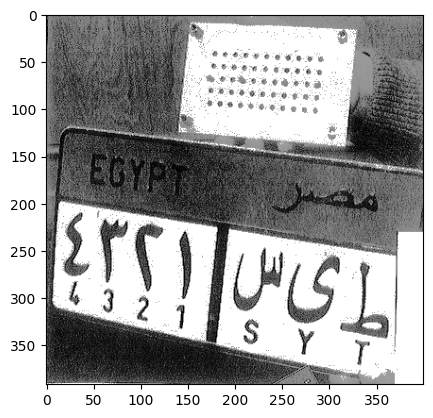

In [12]:
plt.imshow(new_img,cmap='gray')
cv2.imwrite("histogram_equilizer_img_2.png", new_img)